
# <font color="Blue">**[1일차 오후] 객체인식을 위한 이미지데이터 수집** <font>

## <font color="red">**1일차 최종 제출물은 본 ipynb 파일입니다.**
- 조별로 완성된 본 파일을 " 1일차_OO반_OO조.ipynb" 로 파일명을 작성하시어 제출하시고 추출된 이미지데이터셋(130장)를 "1일차_OO반_OO조.zip"으로 압축하여 제출 바랍니다.


# 앞서 배운 내용을 중심으로 본격적으로 이미지 데이터 수집을 위한 전단계 진행하봅니다.
# 사전 준비할 사항이 있습니다.
* car_bike.mp4 파일을 본인 노트북에 다운로드해 주세요

----

# <font color="red">**[미션1]  CCTV 폴더를 만들어 안전모 사례와 동일하게 tutorial 폴더와 image, image30, image100 폴더를 만들어, 캡쳐한 이미지를 각 폴더에 저장해 주세요**
- CCTV폴더 생성
- CCTV > tutorial , CCTV>image, CCTV>image100, CCTV>image30 폴더 생성
- CCTV > tutorial 에 car_bike.mp4 영상 저장
- CCTV>image에는 영상의 전체 프레임 이미지 추출
- CCTV>image100 에는 100프레임부터 200프레임 이미지만 추출
- CCTV>image30 에는 30 프레임단위로 이미지 추출 (30, 60, 90, 120....)

## <font color="Blue">**1. 환경 설정하기**<font>

### **1) 구글 드라이브 연결하기**

In [2]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


### **2) 경로 확인하기**
<font color="red">※ 주의. 경로는 절대 변경하지 마세요.</font>

In [3]:
# ROOT_PATH 확인
import os

ROOT_PATH = '/content/drive/MyDrive/Deep_Learning_KT/project/sample'
# TUTORIAL 데이터 경로
TUTORIAL_PATH = '/content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike'

In [4]:
print(TUTORIAL_PATH)
print(ROOT_PATH)

/content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike
/content/drive/MyDrive/Deep_Learning_KT/project/sample


### **3) 라이브러리 불러오기**
필요시 추가 라이브러리는 설치해서 사용하세요.

In [5]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

---

## <font color="Blue">**2. 데이터 불러오기**<font>
* OpenCV 라이브러리를 활용해서 영상 파일("car_bke.mp4")을 불러오고, 변수명 video에 저장하세요.
   
    >* 파일경로 TUTORAL_PATH에 저장된 car_bike.mp4 파일을 video라는 변수에 저장하세요.
    >* 저장된 영상 파일의 정보를 확인하세요.(영상의 가로, 세로, 총 프레임 수, fps 정보, 영상 길이)


### <font color="green">**[실습1]  파일경로 TUTORIAL_PATH 내 "car_bike.mp4" 파일을 가져와서 어떤 영상인지 플레이해 보세요.** </font>

<font color="red">**[미션 1.1] cv2를 이용해 video라는 변수에 car_bike.mp4 파일 로딩하기**</font>  

In [7]:
# 파일경로 TITORIAL_PATH 내 "car_bike.mp4" 파일을 cv2.VideoCapture()함수를 사용해 video에 저장해보기
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

In [9]:
# video가 열렸는지 확인해보기(열렸다는 의미는 메모리에 video파일이 올라와 있어, 정보와 이미지를 추출할 준비가 되어 있다는 의미임)
# 참고로 video.isOpened()가 False이면 데이터를 가지고 올수 없고, True일때만 가능함

video.isOpened()

True

<font color="red">**[미션 1.2] video 파일을 열어서 해당 화면으로 영상을 플레이해보기**
-  구글에서 "코랩에서 비디오 재생"이라고 검색
- " https://whiteduck.tistory.com/160 " 참조

In [10]:
# 파일 루트만 변경합니다.

from IPython.display import HTML
from base64 import b64encode
mp4 = open(TUTORIAL_PATH + '/car_bike.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

### <font color="green">**[실습2] 영상 파일의 정보를 확인하세요.**</font>
> 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이 정보입니다.

<font color="red">**[미션 2.1]  video, 즉 영상의 정보를 가지고 오세요(https://deep-learning-study.tistory.com/107)**</font>

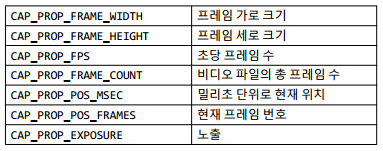

In [14]:
# 영상의 정보들을 가지고 옵니다.
video.release()
video = cv2.VideoCapture(TUTORIAL_PATH + '/car_bike.mp4')

video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)
video_fps = video.get(cv2.CAP_PROP_FPS)

print("width :", video_width)
print("height :", video_height)
print("total frames :", video_length)
print("FPS :", video_fps)

width : 2216.0
height : 1080.0
total frames : 274.0
FPS : 23.976023976023978


In [12]:
# 총 영상의 길이는 FPS와 프레임수를 알면 됩니다. 전체영상시간(초) = 전체프레임수/(초당프레임수), 예시.전체가 600프레임이고, 60 FPS이면, 전체 시간은 10초
video_time = video_length / video_fps
video_time


11.428083333333333

---



## <font color="Blue">**3. 영상으로부터 이미지 데이터 추출하기**
* OpenCV 라이브러리를 활용해서 영상 파일("car_bike.mp4")을 불러온 후, 모든 프레임 또는 일부 프레임을 저장해봅니다.
   
    >* 파일경로 TUTORAL_PATH>image
    >* 총 몇개의 파일들이 저장되었는지 확인


### <font color="green">**[실습3]동영상에서 이미지 컷 하나만 가지고와서 저장해 보세요**

#### <font color="red">**[미션 3.1] 동영상에서 프레임 이미지 하나만 가지고 와 보세요.**
- **영상의 프레임 하나만 이미지로 가지고 오기** (**video.read()**활용)
- https://thinking-developer.tistory.com/61

In [13]:
# 코랩에서는 cv2의 imshow가 안되기 때문에 다른 방법으로 진행해야 함
# https://overface.tistory.com/573
from google.colab.patches import cv2_imshow

Frame no. 1


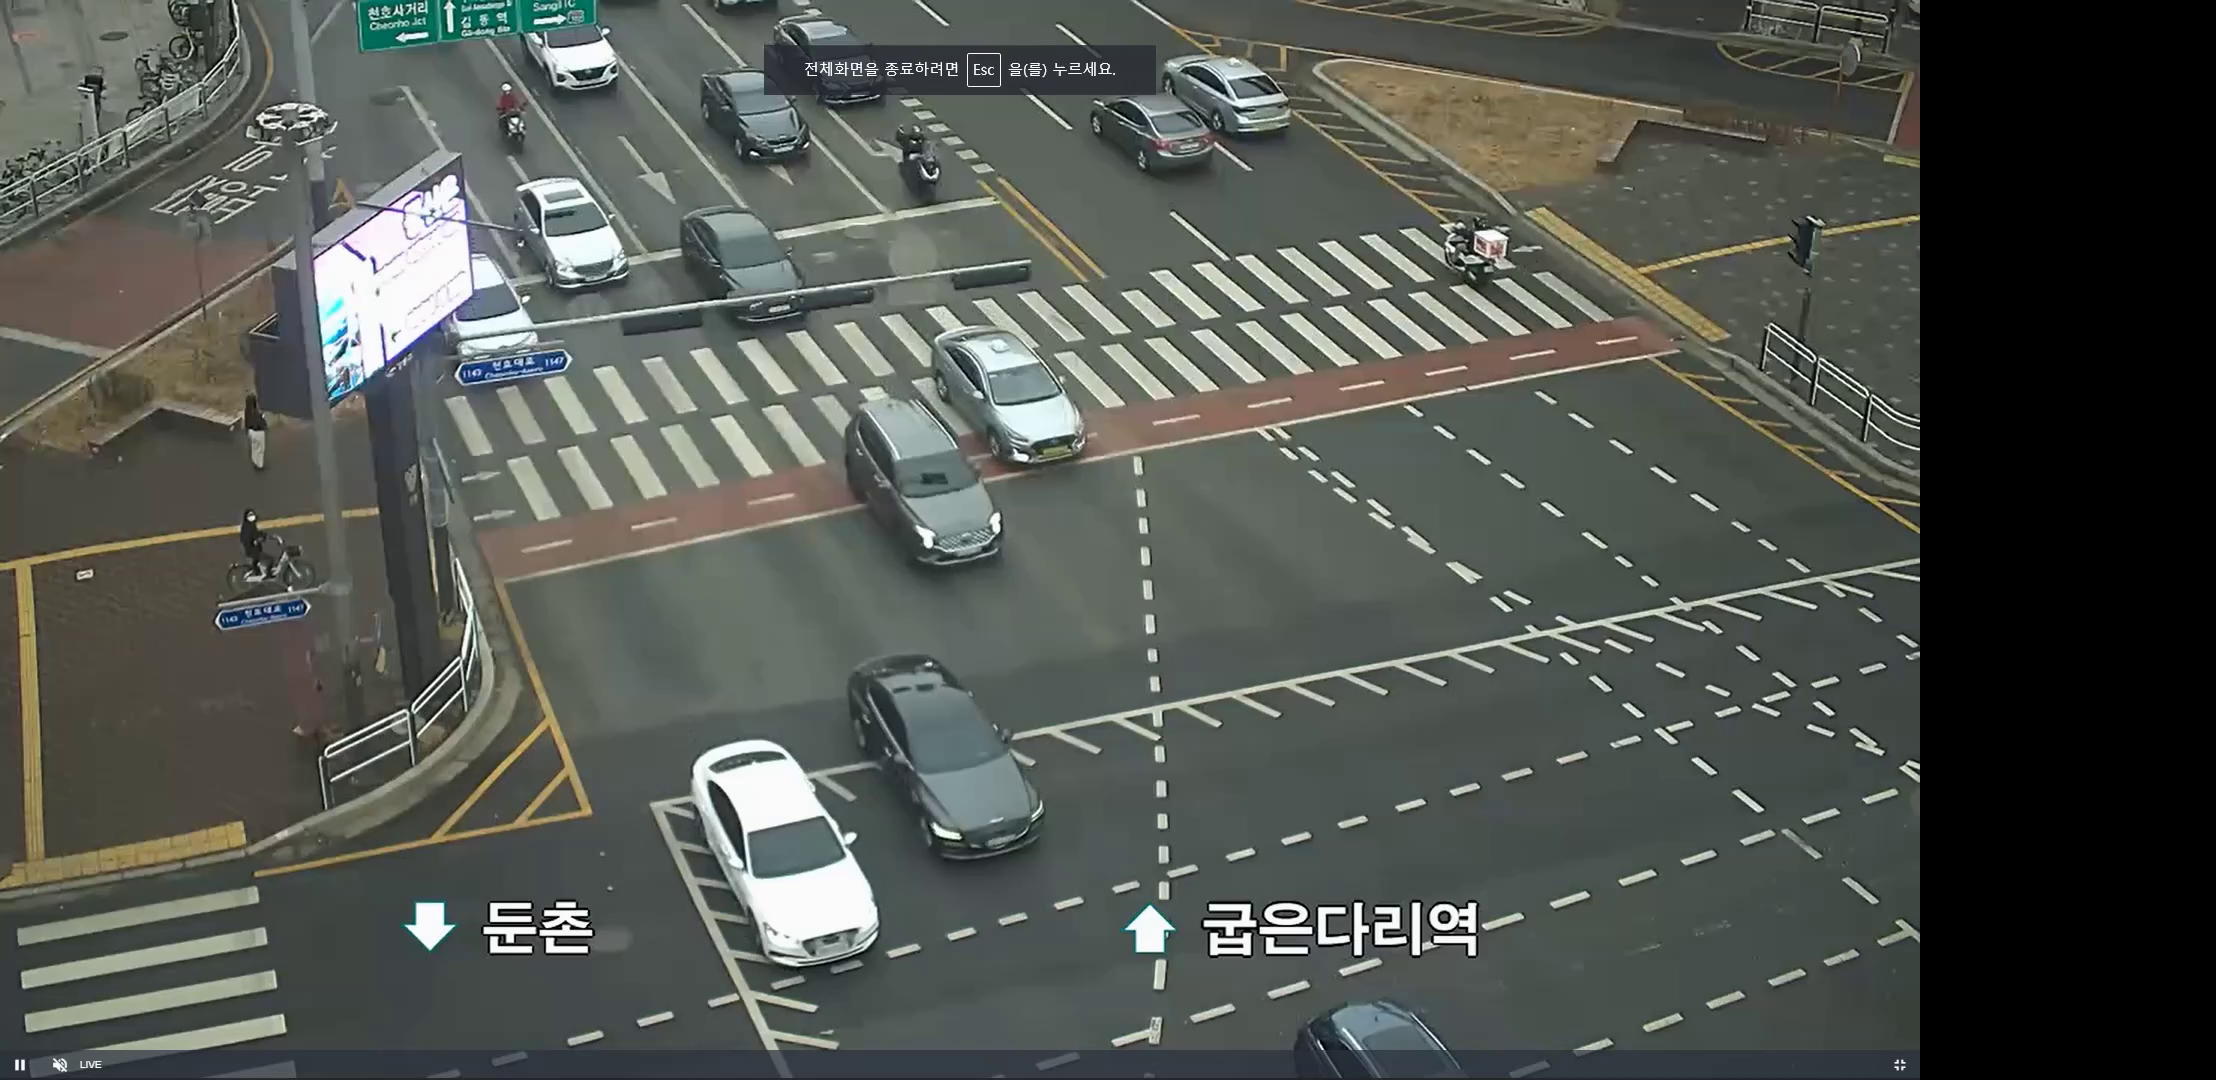

In [15]:
#비디오에서 이미지 하나 첫 프레임 가져오기
ret, frame = video.read()

print("Frame no.",int(video.get(cv2.CAP_PROP_POS_FRAMES)))

cv2_imshow(frame)

##### **[참조] 특정 번째 프레임을 추출하고 싶을때**

In [17]:
#비디오에서 특정 이미지 가져오기
video.set(cv2.CAP_PROP_POS_FRAMES, 219)
ret, frame = video.read()

print("Frame no.",int(video.get(cv2.CAP_PROP_POS_FRAMES)))

cv2_imshow(frame)
video.release()

Output hidden; open in https://colab.research.google.com to view.

#### <font color="red">**[미션 3.2] 동영상에서 모든 프레임이미지를 CCTV>image 폴더에 저장하시고 몇개의 이미지인지 확인해 보세요.**</font>


- **1단계:프레임수(=저장할 이미지수)를 확인하고 저장할 폴더를 지정합니다.**
 - 사전에 구글 드라이브 CCTV밑에 image라는 폴더를 만들어 주세요

In [18]:
import os

#비디오에서 영상 가져오기
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

#프레임 이미지저장할 위치 지정하기, 사전에 CCTV 폴더 밑에 image 폴더 생성해 두기
IMAGE_PATH = TUTORIAL_PATH + '/image'

#저장할 image 폴더 여부와 비디오 오픈 여부 확인
print("image folder:", os.path.exists(IMAGE_PATH))
print("video:", video.isOpened())

#전체 영상 프레임 수 확인하기
print(video.get(cv2.CAP_PROP_FRAME_COUNT))

image folder: True
video: True
274.0


- **2단계:while(video.isOpened())를 활용해 하나씩 프레임을 읽으면서 저장합니다.**
 -
사이즈가 큰 경우 가져올때 image = cv2.resize(frame, (500,400))을 활용하여 용량을 줄여 저장합니다.

In [19]:
# 화면에 보여주는 imshow 호출하고 화면에 보여줍니다.imwrite 활용하여 파일 저장하기

while(video.isOpened()):
  ret, frame = video.read()

  image = cv2.resize(frame, (500, 400))

  cv2.imwrite(IMAGE_PATH+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", image)
  print(f"{str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))}.jpg saved")

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
    break

1.jpg saved
2.jpg saved
3.jpg saved
4.jpg saved
5.jpg saved
6.jpg saved
7.jpg saved
8.jpg saved
9.jpg saved
10.jpg saved
11.jpg saved
12.jpg saved
13.jpg saved
14.jpg saved
15.jpg saved
16.jpg saved
17.jpg saved
18.jpg saved
19.jpg saved
20.jpg saved
21.jpg saved
22.jpg saved
23.jpg saved
24.jpg saved
25.jpg saved
26.jpg saved
27.jpg saved
28.jpg saved
29.jpg saved
30.jpg saved
31.jpg saved
32.jpg saved
33.jpg saved
34.jpg saved
35.jpg saved
36.jpg saved
37.jpg saved
38.jpg saved
39.jpg saved
40.jpg saved
41.jpg saved
42.jpg saved
43.jpg saved
44.jpg saved
45.jpg saved
46.jpg saved
47.jpg saved
48.jpg saved
49.jpg saved
50.jpg saved
51.jpg saved
52.jpg saved
53.jpg saved
54.jpg saved
55.jpg saved
56.jpg saved
57.jpg saved
58.jpg saved
59.jpg saved
60.jpg saved
61.jpg saved
62.jpg saved
63.jpg saved
64.jpg saved
65.jpg saved
66.jpg saved
67.jpg saved
68.jpg saved
69.jpg saved
70.jpg saved
71.jpg saved
72.jpg saved
73.jpg saved
74.jpg saved
75.jpg saved
76.jpg saved
77.jpg saved
78.jpg s

In [20]:
# 추출된 이미지 수 확인하기
file_list = os.listdir(IMAGE_PATH)
print(len(file_list))

274


#### <font color="red">**[미션 3.3] 동영상에서 일부 프레임이미지를 다른 폴더에 저장하시고 몇개의 이미지인지 확인해 보세요.**</font>

- (1번) 프레임번호가 100 부터 200 까지 값만 가지고 저장해 보세요 (CCTV>image100 이라는 폴더에)
- (2번) 30개째 프레임만 저장해보세요. (30, 60, 90... 번째 프레임을  CCTV>image30 폴더에)

##### **(1번)프레임번호가 100~200까지 이미지 저장하기(CCTV>image100)**

In [26]:
# 특정 프레임 에서 플레이 하는 방법은 video.set(cv2.CAP_CAP_PROP_POS_FRAMES, 프레임)
video = cv2.VideoCapture(TUTORIAL_PATH + '/car_bike.mp4')

IMAGE100_PATH = TUTORIAL_PATH + '/image100'

video.set(cv2.CAP_PROP_POS_FRAMES, 99)

while(video.isOpened()):
  ret, frame = video.read()

  if (video.get(cv2.CAP_PROP_POS_FRAMES) <= 200):
    cv2.imwrite(IMAGE100_PATH+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", image)
    print(f"{str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))}.jpg saved")

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
    break

video.release()

100.jpg saved
101.jpg saved
102.jpg saved
103.jpg saved
104.jpg saved
105.jpg saved
106.jpg saved
107.jpg saved
108.jpg saved
109.jpg saved
110.jpg saved
111.jpg saved
112.jpg saved
113.jpg saved
114.jpg saved
115.jpg saved
116.jpg saved
117.jpg saved
118.jpg saved
119.jpg saved
120.jpg saved
121.jpg saved
122.jpg saved
123.jpg saved
124.jpg saved
125.jpg saved
126.jpg saved
127.jpg saved
128.jpg saved
129.jpg saved
130.jpg saved
131.jpg saved
132.jpg saved
133.jpg saved
134.jpg saved
135.jpg saved
136.jpg saved
137.jpg saved
138.jpg saved
139.jpg saved
140.jpg saved
141.jpg saved
142.jpg saved
143.jpg saved
144.jpg saved
145.jpg saved
146.jpg saved
147.jpg saved
148.jpg saved
149.jpg saved
150.jpg saved
151.jpg saved
152.jpg saved
153.jpg saved
154.jpg saved
155.jpg saved
156.jpg saved
157.jpg saved
158.jpg saved
159.jpg saved
160.jpg saved
161.jpg saved
162.jpg saved
163.jpg saved
164.jpg saved
165.jpg saved
166.jpg saved
167.jpg saved
168.jpg saved
169.jpg saved
170.jpg saved
171.jp

##### **(2번)프레임번호가 30, 60, 90 ... 이미지 저장하기(CCTV>image30)**

In [28]:
video = cv2.VideoCapture(TUTORIAL_PATH + '/car_bike.mp4')

IMAGE30_PATH = TUTORIAL_PATH + '/image30'

while(video.isOpened()):
  ret, frame = video.read()

  if (video.get(cv2.CAP_PROP_POS_FRAMES) % 30 == 0):
    cv2.imwrite(IMAGE30_PATH+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", image)
    print(f"{str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))}.jpg saved")

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
    break

video.release()

30.jpg saved
60.jpg saved
90.jpg saved
120.jpg saved
150.jpg saved
180.jpg saved
210.jpg saved
240.jpg saved
270.jpg saved


---

## <font color="Blue">**4. 확보한 이미지 데이터 한눈에 확인하기**
* 이미지 파일의 이름과 경로 데이터를 확보한 후에 CCTV>image30에 저장된 이미지 데이터를 화면에 뿌려 확인합니다.
   
    >* glob를 통해 파일 패스 저장하기
    >* imshow와 subplot를 통해 그림들을 리스트업하기

#### <font color="green">**[실습 4] "image30" 폴더내의 이미지들을 img_list에 저장합니다**

In [29]:
# 이미지 리스트를 우선 가지고 옴 (이미지 30폴더)
img_list = glob.glob(IMAGE30_PATH + '/*.jpg')
print(len(img_list))

9


#### <font color="red">**[미션 4.1]img_list에 저장된 이미지를 노트북 화면에 매트릭스 형태로 볼수 있게 해 주세요**</font>
- rows = OOO 행, Columns = OOOO 열로 해서 보여 주세요 (적당히 결정하세요)
- https://foss4g.tistory.com/1263 를 참조해 주세요

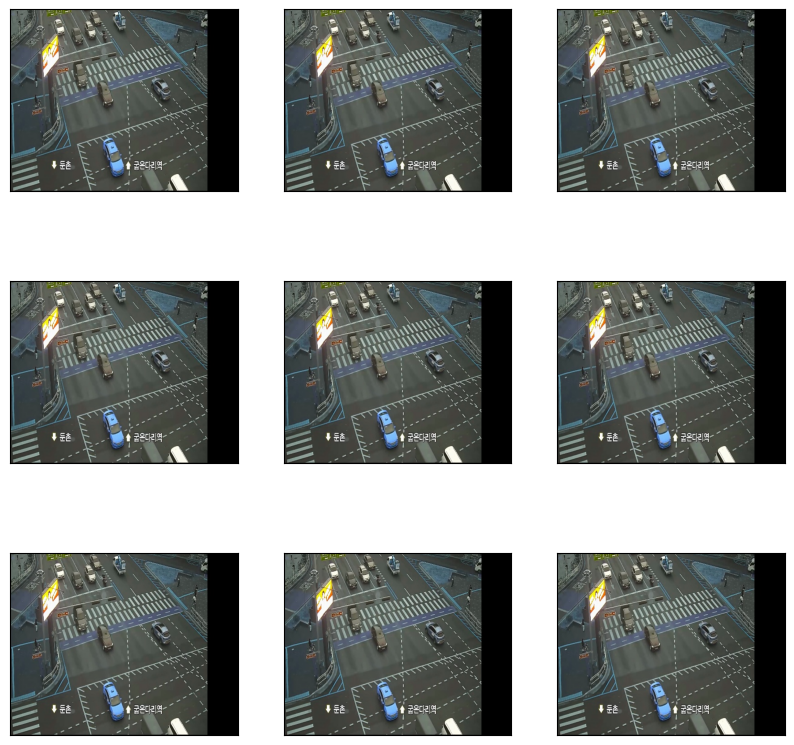

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
rows = 3
cols = 3
i = 1

for filename in img_list:
  img = cv2.imread(filename)
  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img)

  ax.set_xticks([]), ax.set_yticks([])
  i += 1

plt.show()

###### **그림 하단에 파일명을 넣고 싶다면 어떻게 해야 할까?**

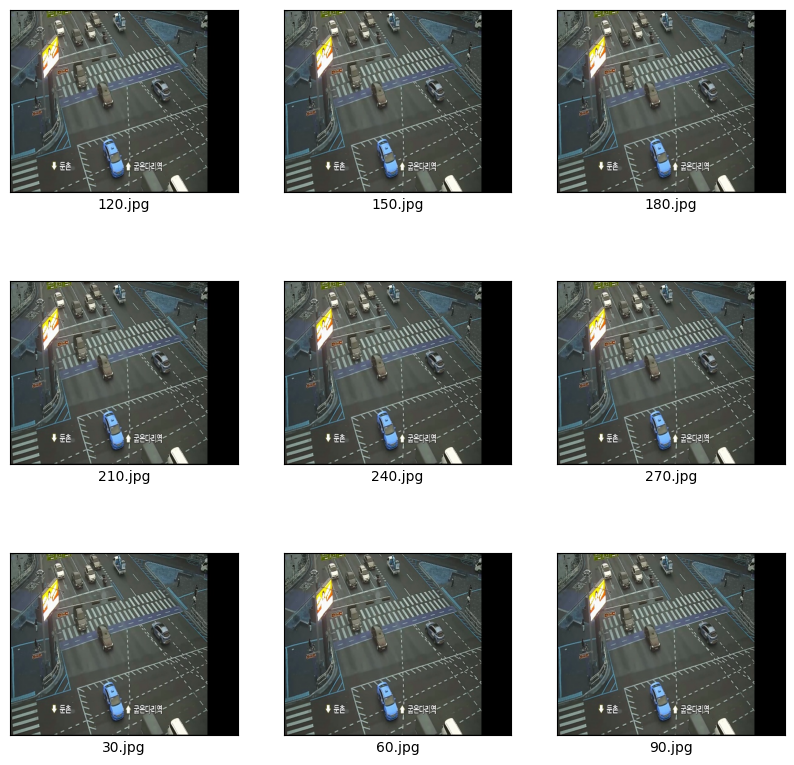

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
rows = 3
cols = 3
i = 1

for filename in img_list:
  img = cv2.imread(filename)
  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img)

  xlabel = filename.split('/')[-1]
  ax.set_xlabel(xlabel)
  ax.set_xticks([]), ax.set_yticks([])
  i += 1

plt.show()

# <font color="red">**[미션2] 13개의 CCTV 영상으로 부터 최소 10장 이상의 이미지 샘플를 추출해 주시기 바랍니다.**
- 13개의 CCTV영상을 다운로드해 주세요.
- 13개의 CCTV영상을 구글드라이브의 "CCTV>cctv_list" 에 복사해 주세요.
- 13개 CCTV 영상에서 10개의 이미지 샘플를 추출해 주시기 바랍니다.
  (하나씩 돌려서 뽑을수 도 있겠지만, for cctv in cctv_list: 로 해서 하나씩 영상을 가지고 자동으로 추출할수 있도록 프로그래밍해주세요)
- 추출시 "추출한영상파일명_프레임위치.jpg(예시: CCTV영상2_30.jpg)" 로 저장해주세요.
- 저장 위치는 CCTV > cctv_data 입니다

## **1. 환경설정하기**

### **1.1 구글 드라이브 연결**

In [ ]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')


### **1.2 필요한 라이브러리 임포트**

In [ ]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### **1.3 동영상위치 및 저장할 위치 확인**
- /content/drive/MyDrive/CCTV/cctv_list : 동영상 위치
  - LABEL_PATH = "/content/drive/MyDrive/CCTV/cctv_list 로 저장 하고 확인하기
- /content/drive/MyDrive/CCTV/cctv_data : 이미지 위치
  - LABEL_IMAGE_PATH = "/content/drive/MyDrive/CCTV/cctv_data" 저장하고 확인하기

In [36]:
import os

LABEL_PATH = "/content/drive/MyDrive/Deep_Learning_KT/project/cctv_train"

LABEL_IMAGE_PATH = "/content/drive/MyDrive/Deep_Learning_KT/project/CCTV/cctv_data"

## **2.동영상 데이터 정보 확인하기**

- 다음과 같은 형태로 모든 영상 정보가 리스트업 되게 함

CCTV영상9.mp4 정보:  True<BR>
 -가로 : 2216.0<BR>
 -세로 : 1080.0<BR>
 -총 프레임 수 : 374.0<BR>
 -FPS : 23.976023976023978<BR>
 -영상 길이 : 16 초 <BR>


In [37]:
#  영상들이 모여있는 폴더에서 파일명을 리스트로 가지고 오기(os.listdir를 활용, 이 명령은 디렉토리명은 없고 단지 파일명만 가지고온다.)
file_names = os.listdir(LABEL_PATH)

# 하나씩 파일명을 가지고 오면서 정보 확인 (정보 확인 하는 방법은 위와 동일 하지만 for 구문을 활용해 전체 파일의 정보를 한번에 확인)
for file in file_names:
  print(file)




CCTV영상12.mp4
CCTV영상4.mp4
CCTV영상1.mp4
CCTV영상13.mp4
CCTV영상3.mp4
CCTV영상11.mp4
CCTV영상10.mp4
CCTV영상2.mp4
CCTV영상5.mp4
CCTV영상6.mp4
CCTV영상9.mp4
CCTV영상7.mp4
CCTV영상8.mp4


## **3.동영상로 부터 이미지 데이터 추출하기**
 - 각 동영상의 Frame수를 가지고 10등분 이상하여 10개의 이미지만 추출하기
 - 방법은 전체 Frame수를 10을 나눈 값을이 추출 되는 프레임 번호가 됨
 - Frame 번호에 따른 배수로 가지고 오는 방법도 있음
 - 프레임수가 120이면, 10개를 취할려면 12,24,36... 형태로 가지고 와야함
 - 추출된 이미지는 모두 하나의 폴더인 cctv_data에 저장함

In [38]:
#[참조1] Frequncy 도출하는 코드, 즉 총 프레임수가 281개 이므로 프레임이 28번의 배수 일때만다 가져오는 코드임

video = cv2.VideoCapture(LABEL_PATH + "/CCTV영상1.mp4")
print(video.get(cv2.CAP_PROP_FRAME_COUNT))

# 몇장을 추출할것인지요
n = 10

# 현 비디오의 전체 Frame 수 정보 가져오기
video.get(cv2.CAP_PROP_FRAME_COUNT)

# 몇번마다 추출할것인지
frequency = int(video.get(cv2.CAP_PROP_FRAME_COUNT)/n)

print(frequency)

video.release()


281.0
28


In [39]:
#[참조2] 하나의 영상에만 적용하여 정확히 나오는지 확인하는 코드

video = cv2.VideoCapture(LABEL_PATH + "/CCTV영상1.mp4")

while(video.isOpened()):
  ret,frame = video.read()


  image = cv2.resize(frame, (450, 300))

  # 몇장을 추출할것인지요
  n = 10

  # 현 비디오의 전체 Frame 수 정보 가져오기
  video.get(cv2.CAP_PROP_FRAME_COUNT)

  # 몇번마다 추출할것인지
  frequency = int(video.get(cv2.CAP_PROP_FRAME_COUNT)/n)

  if(int(video.get(cv2.CAP_PROP_POS_FRAMES)) % frequency ==0):
    cv2_imshow(image)
    print('저장된 프레임 위치 : ' + str(video.get(cv2.CAP_PROP_POS_FRAMES)))
    #cv2.imwrite(LABEL_IMAGE_PATH+"/"+ FILE_NAME.split('.')[0] + str(video.get(cv2.CAP_PROP_POS_FRAMES))+".jpg", image)

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
      break



video.release()

Output hidden; open in https://colab.research.google.com to view.

In [45]:
# 위의 코드를 활용해 전체적인 CCTV파일들에서 10장씩 뽑아 오고 cctv_data에 저장하기
file_list = glob.glob(LABEL_PATH + '/*.mp4')

for file in file_list:
  video = cv2.VideoCapture(file)
  file_name = file.split('/')[-1]
  while(video.isOpened()):
    ret,frame = video.read()

    image = cv2.resize(frame, (450, 300))

    # 몇장을 추출할것인지요
    n = 10

    # 현 비디오의 전체 Frame 수 정보 가져오기
    video.get(cv2.CAP_PROP_FRAME_COUNT)

    # 몇번마다 추출할것인지
    frequency = int(video.get(cv2.CAP_PROP_FRAME_COUNT)/n)

    if(int(video.get(cv2.CAP_PROP_POS_FRAMES)) % frequency ==0):
      #cv2_imshow(image)
      print('저장된 프레임 위치 : ' + str(int(video.get(cv2.CAP_PROP_POS_FRAMES))))
      cv2.imwrite(LABEL_IMAGE_PATH+"/"+ file_name.split('.')[0] + '_' + str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", image)

    if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
      print(file_name, 'complete')
      break

  video.release()

저장된 프레임 위치 : 81
저장된 프레임 위치 : 162
저장된 프레임 위치 : 243
저장된 프레임 위치 : 324
저장된 프레임 위치 : 405
저장된 프레임 위치 : 486
저장된 프레임 위치 : 567
저장된 프레임 위치 : 648
저장된 프레임 위치 : 729
저장된 프레임 위치 : 810
CCTV영상12.mp4 complete
저장된 프레임 위치 : 49
저장된 프레임 위치 : 98
저장된 프레임 위치 : 147
저장된 프레임 위치 : 196
저장된 프레임 위치 : 245
저장된 프레임 위치 : 294
저장된 프레임 위치 : 343
저장된 프레임 위치 : 392
저장된 프레임 위치 : 441
저장된 프레임 위치 : 490
CCTV영상4.mp4 complete
저장된 프레임 위치 : 28
저장된 프레임 위치 : 56
저장된 프레임 위치 : 84
저장된 프레임 위치 : 112
저장된 프레임 위치 : 140
저장된 프레임 위치 : 168
저장된 프레임 위치 : 196
저장된 프레임 위치 : 224
저장된 프레임 위치 : 252
저장된 프레임 위치 : 280
CCTV영상1.mp4 complete
저장된 프레임 위치 : 67
저장된 프레임 위치 : 134
저장된 프레임 위치 : 201
저장된 프레임 위치 : 268
저장된 프레임 위치 : 335
저장된 프레임 위치 : 402
저장된 프레임 위치 : 469
저장된 프레임 위치 : 536
저장된 프레임 위치 : 603
저장된 프레임 위치 : 670
CCTV영상13.mp4 complete
저장된 프레임 위치 : 32
저장된 프레임 위치 : 64
저장된 프레임 위치 : 96
저장된 프레임 위치 : 128
저장된 프레임 위치 : 160
저장된 프레임 위치 : 192
저장된 프레임 위치 : 224
저장된 프레임 위치 : 256
저장된 프레임 위치 : 288
저장된 프레임 위치 : 320
CCTV영상3.mp4 complete
저장된 프레임 위치 : 68
저장된 프레임 위치 : 136


In [46]:
image_list = glob.glob(LABEL_IMAGE_PATH + '/*.jpg')
print(len(image_list))

130
